In [2]:
import glob
import pickle
from matplotlib.ticker import MaxNLocator

In [15]:
raw_history = {}
raw_relationships = {}
raw_accuracy = {}
raw_communication = {}
# cifar10_10_bandit_case3_20tickets_5ep_20_r
# try increasing local epochs to 20 ? 
# try increasing model complexity

filename = 'bandit_number_10_ticket_number_20_rounds_5_epochs_per_round_4_dirname__dataset_dist_uniform_dataset_cifar10_eta_3_model_cnn_mode_fedavg_'

for i,file in enumerate(glob.glob(f'{filename}/loss*.txt')):
    print(file)
    with open(file, 'rb') as f:
        raw_history[i] = pickle.load(f)

for i,file in enumerate(glob.glob(f'{filename}/relationships*.txt')):
    print(file)
    with open(file, 'rb') as f:
        raw_relationships[i] = pickle.load(f)

for i,file in enumerate(glob.glob(f'{filename}/accuracy*.txt')):
    print(file)
    with open(file, 'rb') as f:
        raw_accuracy[i] = pickle.load(f)

for i,file in enumerate(glob.glob(f'{filename}/communication*.txt')):
    print(file)
    with open(file, 'rb') as f:
        raw_communication[i] = pickle.load(f)


bandit_number_10_ticket_number_20_rounds_5_epochs_per_round_4_dirname__dataset_dist_uniform_dataset_cifar10_eta_3_model_cnn_mode_fedavg_/loss_0.txt
bandit_number_10_ticket_number_20_rounds_5_epochs_per_round_4_dirname__dataset_dist_uniform_dataset_cifar10_eta_3_model_cnn_mode_fedavg_/loss_4.txt
bandit_number_10_ticket_number_20_rounds_5_epochs_per_round_4_dirname__dataset_dist_uniform_dataset_cifar10_eta_3_model_cnn_mode_fedavg_/loss_9.txt
bandit_number_10_ticket_number_20_rounds_5_epochs_per_round_4_dirname__dataset_dist_uniform_dataset_cifar10_eta_3_model_cnn_mode_fedavg_/loss_3.txt
bandit_number_10_ticket_number_20_rounds_5_epochs_per_round_4_dirname__dataset_dist_uniform_dataset_cifar10_eta_3_model_cnn_mode_fedavg_/loss_1.txt
bandit_number_10_ticket_number_20_rounds_5_epochs_per_round_4_dirname__dataset_dist_uniform_dataset_cifar10_eta_3_model_cnn_mode_fedavg_/loss_2.txt
bandit_number_10_ticket_number_20_rounds_5_epochs_per_round_4_dirname__dataset_dist_uniform_dataset_cifar10_eta_

In [16]:
import matplotlib.pyplot as plt

In [17]:
import json

In [18]:
def compute_l1(filename, base):
    with open(filename) as f:
        data = json.load(f)
        base=set(data[str(base)])
        l1_dist={}
        for i in range(1,10):
            l1_dist[i]=len(base-set(data[str(i)]))
    return l1_dist

In [19]:
compute_l1("case_3.json", 0)

{1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 2, 9: 3}

In [20]:
[x[0] for x in raw_history[0]]

['train_round',
 'aggregation_round_0',
 'train_round',
 'aggregation_round_1',
 'train_round',
 'aggregation_round_2',
 'train_round',
 'aggregation_round_3',
 'train_round',
 'aggregation_round_4',
 'train_round_0']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, "Accuracy after local training for each of Bob's peer")

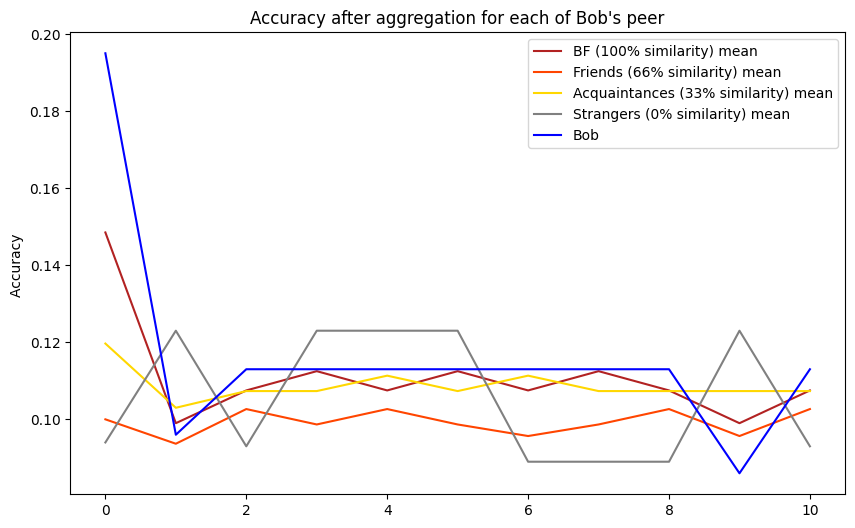

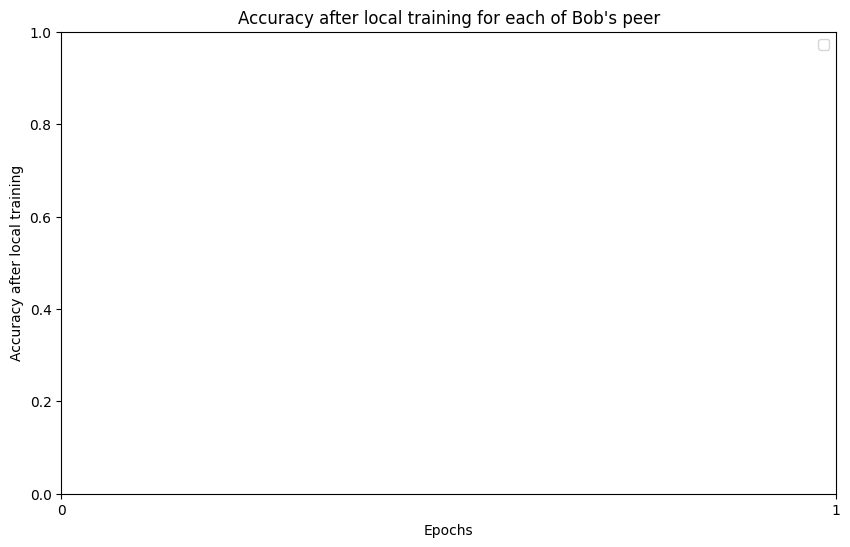

In [21]:

mean_accuracy = []
bob = 1
l1_dist = compute_l1("case_3.json", bob)
color_mapping = {0:"firebrick", 1:"orangered", 2:"gold", 3:"grey"}
label_mapping = {0:"BF (100% similarity)", 1:"Friends (66% similarity)", 2:"Acquaintances (33% similarity)", 3:"Strangers (0% similarity)"}
mean_accuracy_per_l1 = {0:[], 1:[], 2:[], 3:[]}

ax = plt.figure(figsize=(10,6)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2 = plt.figure(figsize=(10,6)).gca()
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
for j in range(len(raw_accuracy[1])):
    acc=0
    acc_per_l1={0:0, 1:0, 2:0, 3:0}
    counter_per_l1 = {0:0, 1:0, 2:0, 3:0}

    for i in l1_dist.keys():
        acc += raw_accuracy[i][j][1]
        acc_per_l1[l1_dist[i]] += raw_accuracy[i][j][1]
        counter_per_l1[l1_dist[i]] += 1
    mean_accuracy.append(acc/len(raw_accuracy))
    for i in acc_per_l1.keys():
        mean_accuracy_per_l1[i].append(acc_per_l1[i]/counter_per_l1[i])
for i in acc_per_l1.keys():
    ax.plot( mean_accuracy_per_l1[i], label=f"{label_mapping[i]} mean", color=color_mapping[i])
    #ax2.plot( mean_accuracy_per_l1[i], label=f"{label_mapping[i]} mean", color=color_mapping[i])
labels = []

ax.plot( [x[1] for x in raw_accuracy[bob]], label="Bob", color="blue")
#ax2.plot( [x[1] for x in raw_accuracy[bob][::2]], label="Bob", color="blue")
#plt.scatter(x_ticks, mean_accuracy[:20][1::2], label="total mean", color="black", linestyle="--")

#plt.plot(x_ticks, mean_accuracy[:20][::2], label="total mean", color="black", linestyle="--")
ax.legend()
ax2.legend()
plt.xlabel("Epochs")
ax.set_ylabel("Accuracy ")
ax2.set_ylabel("Accuracy after local training")
ax.set_title("Accuracy after aggregation for each of Bob's peer")
ax2.set_title("Accuracy after local training for each of Bob's peer")


In [9]:
# Compute correlation between each each mean and bob
import numpy as np
from scipy.stats import pearsonr
for i in acc_per_l1.keys():
    print(f"aggregation accuracy for dist: {i}", pearsonr(mean_accuracy_per_l1[i][1::2], [x[1] for x in raw_accuracy[bob][1::2]]))
    print(f"training accuracy for dist: {i}", pearsonr(mean_accuracy_per_l1[i][::2], [x[1] for x in raw_accuracy[bob][::2]]))

NameError: name 'acc_per_l1' is not defined

In [10]:
raw_history[3]

[('train_round', 0.7868117094039917),
 ('aggregation_round_0', 2.7972097396850586),
 ('train_round', 1.098618984222412),
 ('aggregation_round_1', 1.0825457572937012),
 ('train_round', 1.0707041025161743),
 ('aggregation_round_2', 1.139464259147644),
 ('train_round', 1.0695292949676514),
 ('aggregation_round_3', 1.312992811203003),
 ('train_round', 1.0722413063049316),
 ('aggregation_round_4', 1.6355441808700562),
 ('train_round_3', 1.07302725315094)]

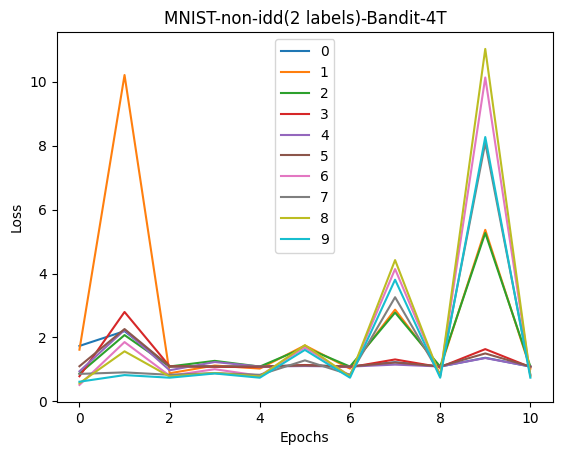

In [11]:
plt.title("Loss History ")
for i in raw_history:
    plt.plot([x[1] for x in raw_history[i]], label=i)
    plt.title("MNIST-non-idd(2 labels)-Bandit-4T")

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()


In [12]:
l1_dist

NameError: name 'l1_dist' is not defined

IndexError: list index out of range

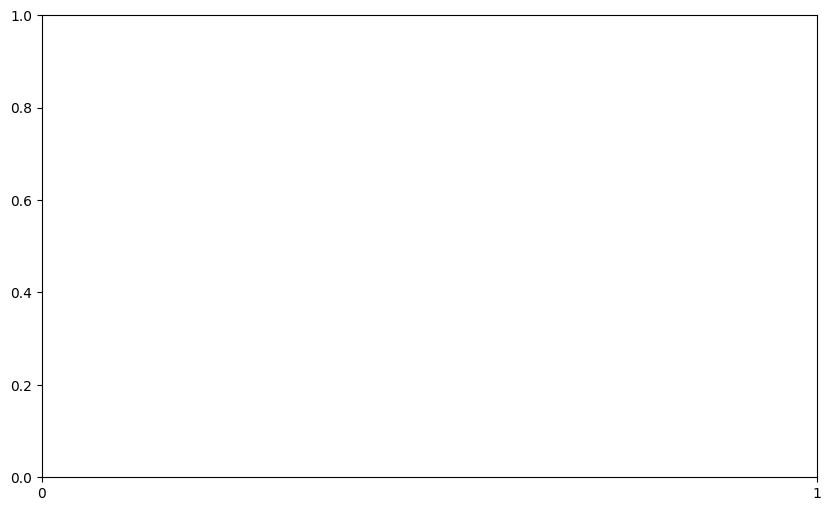

In [13]:
ax = plt.figure(figsize=(10,6)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
bob = 0
for peer in raw_relationships[0][0].keys():
    if peer == bob:
        plt.plot([x[peer] for x in raw_relationships[0]], label=f"Bob", color="blue")

        continue
    plt.plot([x[peer] for x in raw_relationships[0]], label=f"{label_mapping[l1_dist[peer]]}", color=color_mapping[l1_dist[peer]])

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title("Probability of "+str(bob)+ " to pick a given peer for aggregation")
plt.xlabel("Epochs")
plt.ylabel("Probabilit of picking a given peer for next rounds")


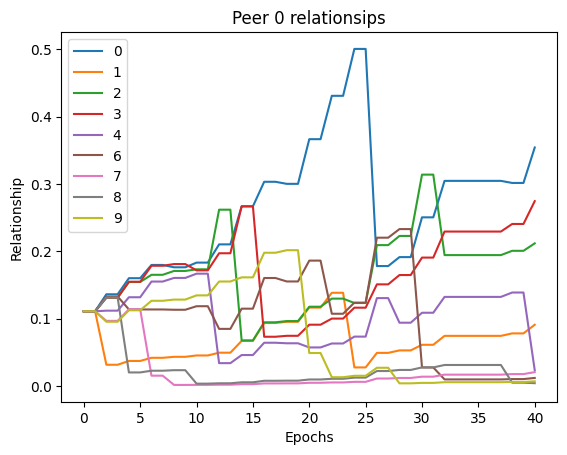

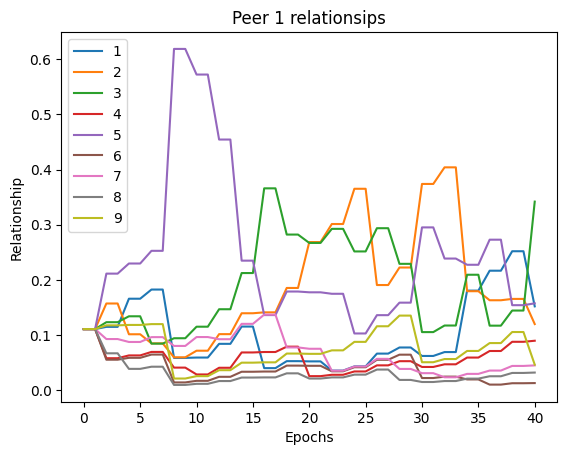

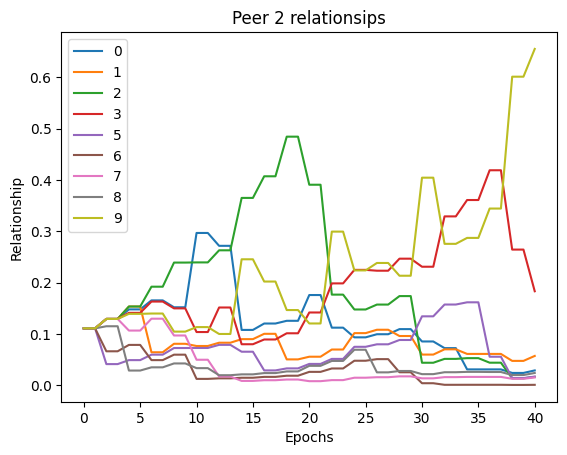

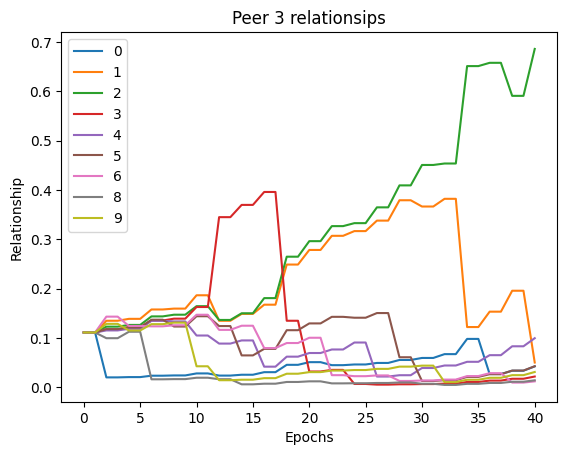

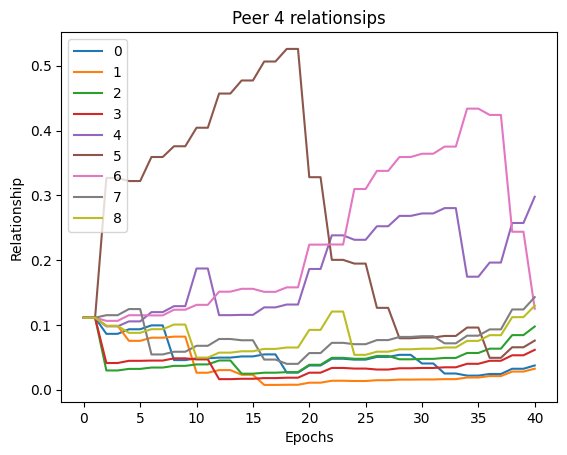

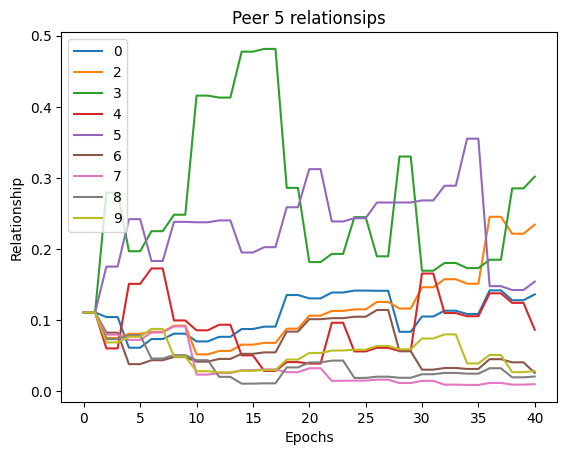

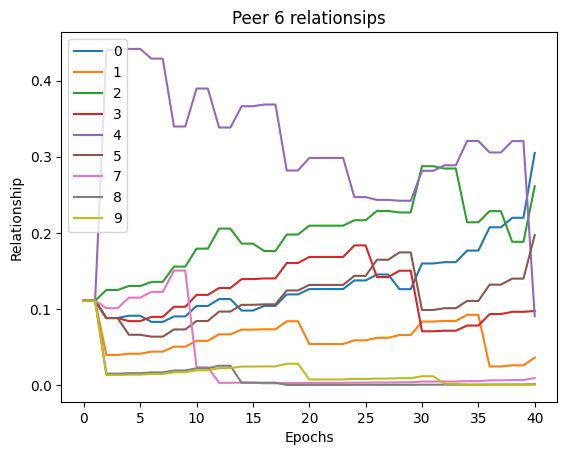

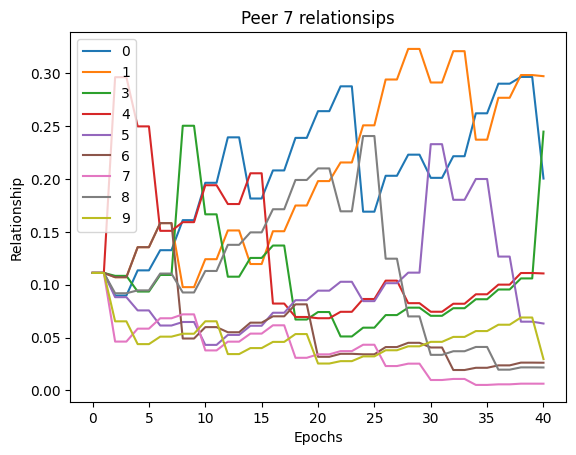

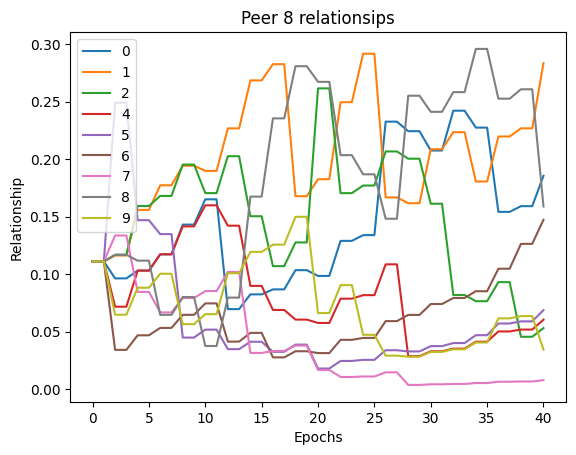

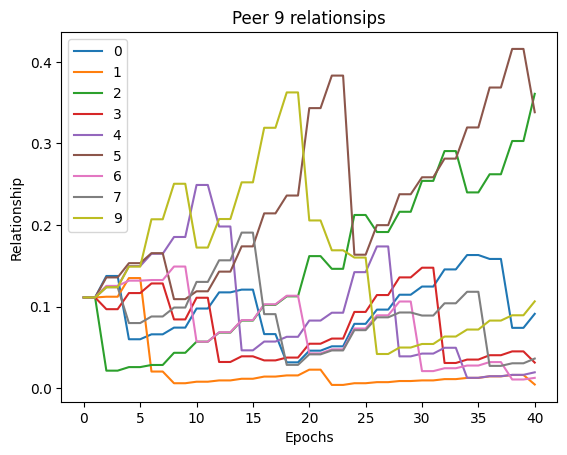

In [227]:
for i in raw_relationships.keys():
    ax = plt.figure().gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    for peer in raw_relationships[i][0].keys():
        plt.plot([x[peer] for x in raw_relationships[i]], label=peer)
        plt.title("Peer " + str(i) +" relationsips")
        plt.xlabel("Epochs")
        plt.ylabel("Relationship")
        plt.legend()

In [ ]:
for peer in history.keys():
    print(peer)
    plt.plot(history[peer])
    plt.title("Peer " + str(peer))
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

NameError: name 'history' is not defined